In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC


from dwd.toy_data import sample_meatballs
from dwd.dwd import DWD
from dwd.viz import clf2D_slope_intercept, ABLine2D

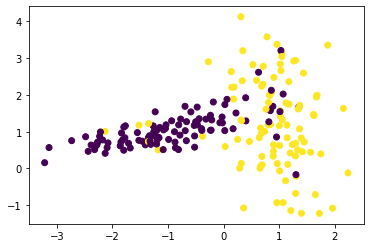

In [9]:
params = {'n_features': 2,
          'n_redundant': 0,
          'n_classes': 2,
          'n_clusters_per_class': 1,
          'flip_y': .1,
          'class_sep': 1.0}

X, y = make_classification(n_samples=200, random_state=0, **params)


plt.scatter(X[:, 0], X[:, 1], c=y)

In [22]:
%time dwd = DWD(C=1).fit(X, y)
%time svm = LinearSVC(loss='hinge', C=1).fit(X, y)

print('dwd training error: {}'.format(np.mean(dwd.predict(X) != y)))
print('svm training error: {}'.format(np.mean(svm.predict(X) != y)))

CPU times: user 1.06 s, sys: 23.5 ms, total: 1.08 s
Wall time: 523 ms
CPU times: user 989 µs, sys: 154 µs, total: 1.14 ms
Wall time: 1.07 ms
dwd training error: 0.145
svm training error: 0.12


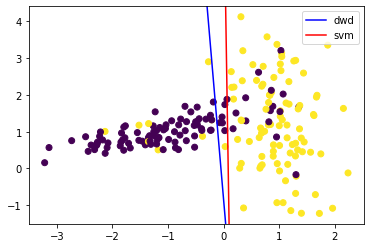

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y)

ABLine2D(*clf2D_slope_intercept(dwd), label='dwd', color='blue')
ABLine2D(*clf2D_slope_intercept(svm), label='svm', color='red')
plt.legend()